In [1]:
!pip install streamlit


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.drop("customerID",axis=1,inplace=True)

In [7]:
for i in df.columns:
    print(i,":",df[i].unique())
    print()

gender : ['Female' 'Male']

SeniorCitizen : [0 1]

Partner : ['Yes' 'No']

Dependents : ['No' 'Yes']

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService : ['No' 'Yes']

MultipleLines : ['No phone service' 'No' 'Yes']

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : ['No' 'Yes' 'No internet service']

OnlineBackup : ['Yes' 'No' 'No internet service']

DeviceProtection : ['No' 'Yes' 'No internet service']

TechSupport : ['No' 'Yes' 'No internet service']

StreamingTV : ['No' 'Yes' 'No internet service']

StreamingMovies : ['No' 'Yes' 'No internet service']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges : [29.85 56.95 53.

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

Missing values in TotalCharges: 11


In [9]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [10]:
X = df.drop("Churn",axis = 1)
y = df["Churn"]

In [11]:
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print()
print(f"Target distribution:{y.value_counts()}")

Features shape: (7043, 19)
Target shape: (7043,)

Target distribution:Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [12]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
X[["OnlineSecurity",'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']] = X[["OnlineSecurity",'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']].replace('No internet service',"No")

In [14]:
X["MultipleLines"].replace('No phone service',"No",inplace=True)

In [15]:
ohe_cols = ["gender", "PaymentMethod"] + [i for i in X.columns if "Yes" in X[i].unique()]

In [16]:
ohe = OneHotEncoder(drop="first",sparse_output=False)
ohe_df = pd.DataFrame(ohe.fit_transform(X[ohe_cols]),columns=ohe.get_feature_names_out())

In [17]:
ord_encoder = OrdinalEncoder(categories=[['No','DSL', 'Fiber optic']]) 
X["InternetService"] = ord_encoder.fit_transform(X[["InternetService"]])

In [18]:
ord_encoder = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']]) 
X["Contract"]=ord_encoder.fit_transform(X[["Contract"]])

In [19]:
X = pd.concat([X.drop(ohe_cols, axis=1).reset_index(drop=True),ohe_df.reset_index(drop=True)], axis=1)

In [20]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [24]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}")

Accuracy: 80.13


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [27]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}")

Accuracy: 74.31


In [28]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

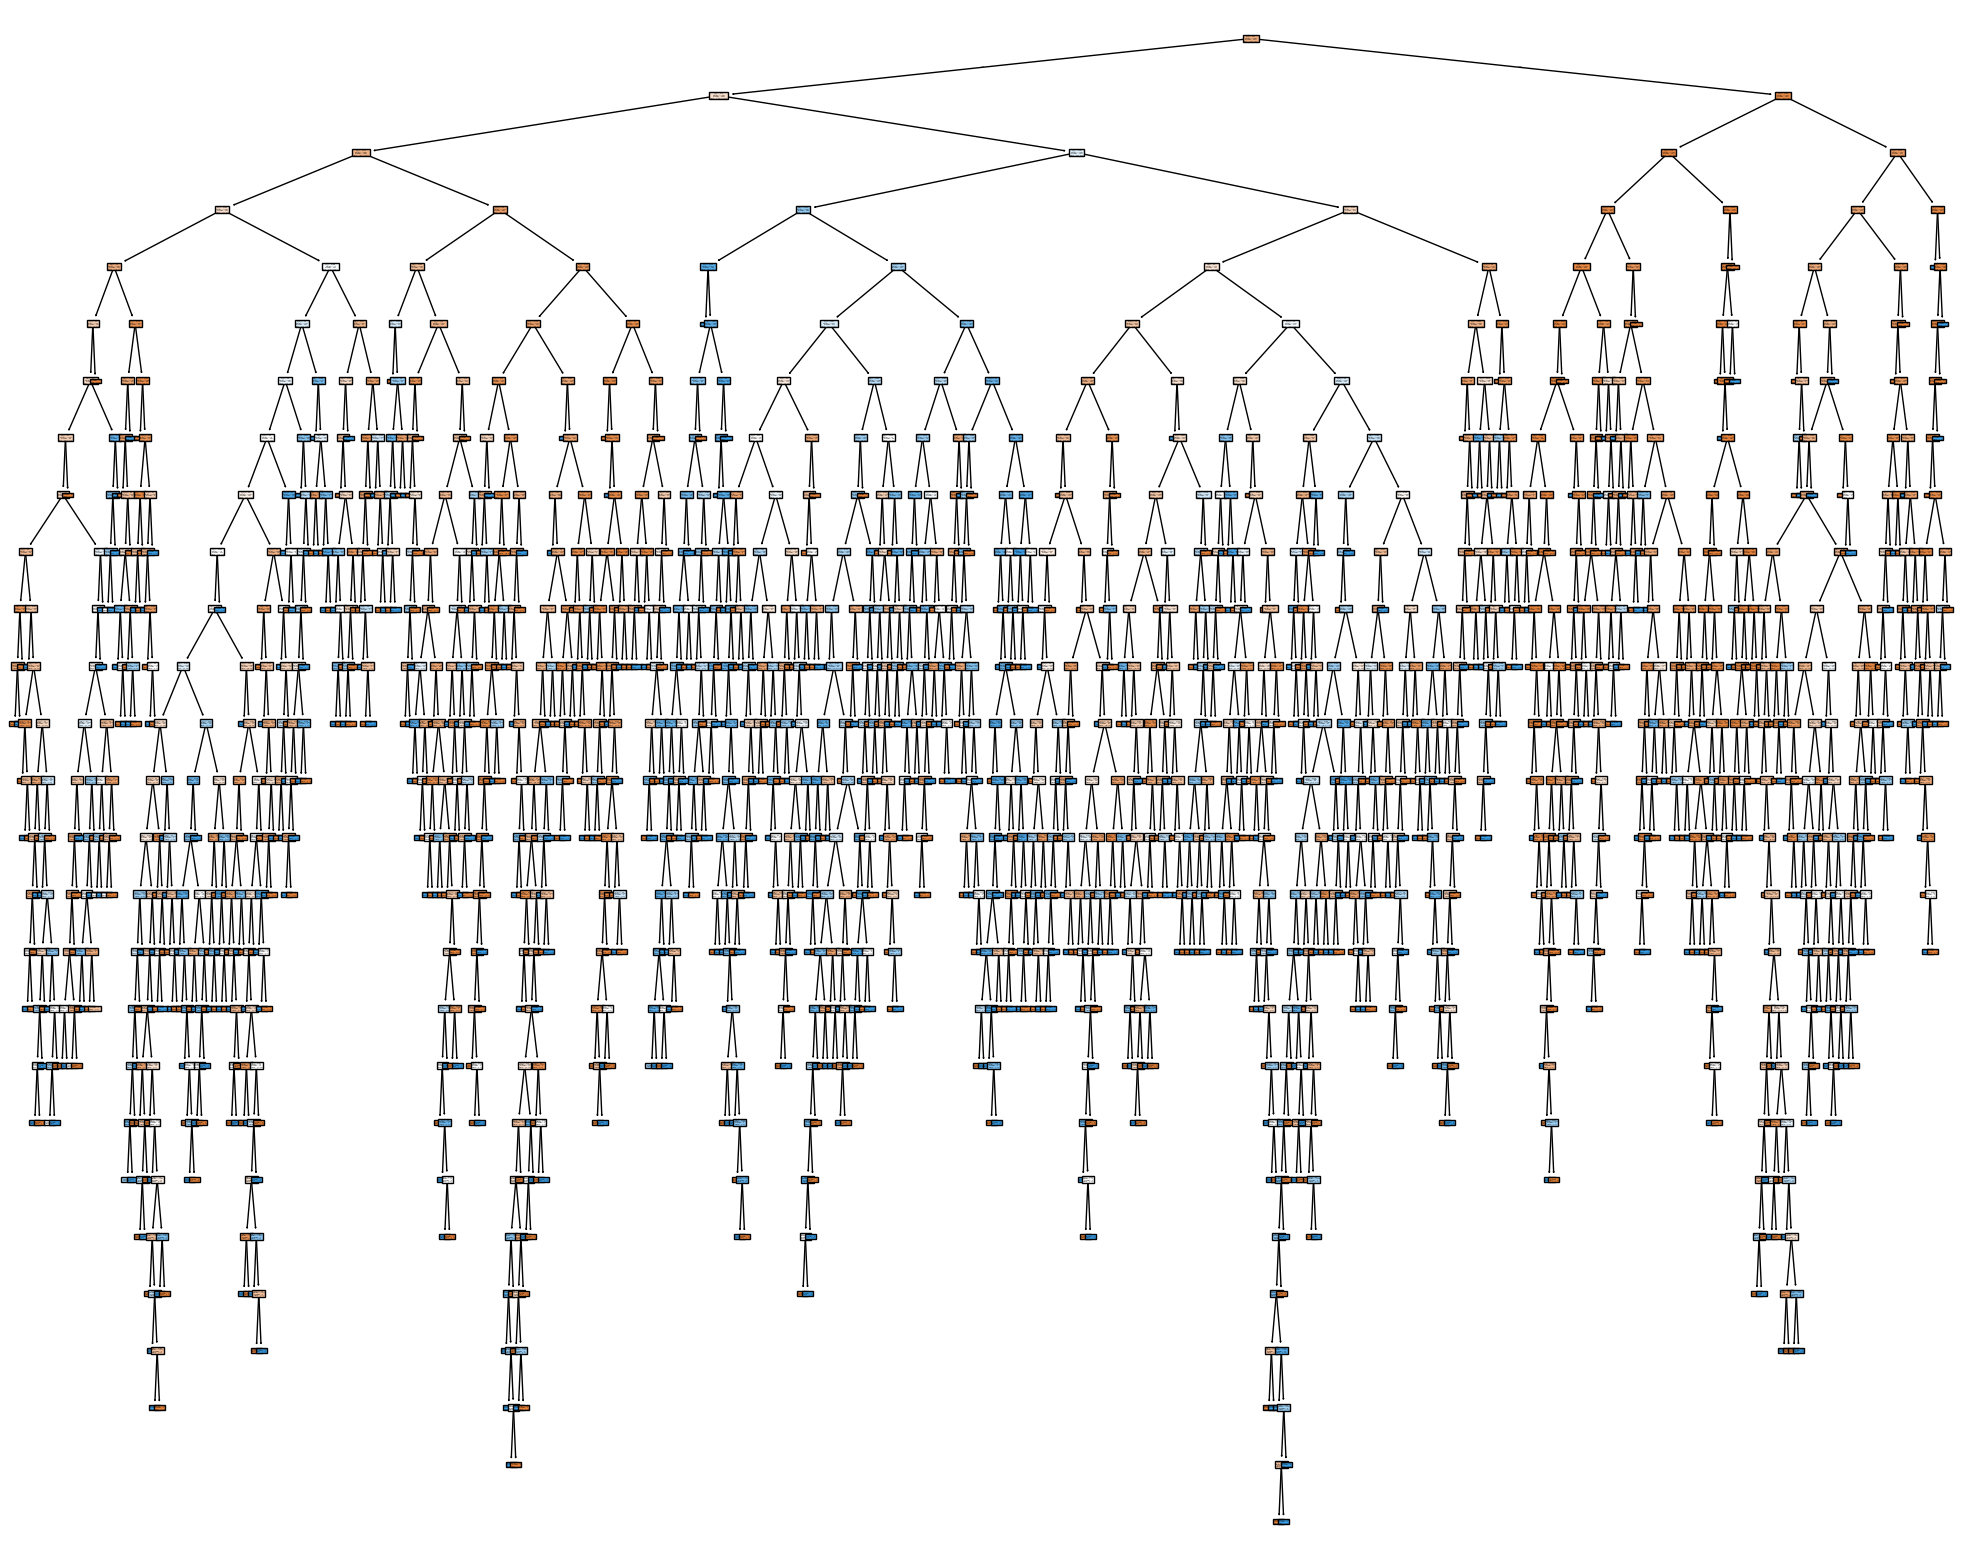

In [29]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,

                   filled=True)

In [30]:
from sklearn.svm import SVC

In [31]:
sv = SVC(kernel = "linear")
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)


In [32]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}")

Accuracy: 82.04


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# =========================
# 1. TRAINING PIPELINE
# =========================

def train_model():
    # Load dataset (same as in your notebook)
    df = pd.read_csv("Telco-Customer-Churn.csv")

    # Drop customerID (same as notebook)
    if "customerID" in df.columns:
        df.drop("customerID", axis=1, inplace=True)

    # Convert TotalCharges to numeric and handle missing (same logic as notebook)
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

    # Split features/target
    X = df.drop("Churn", axis=1)
    y = df["Churn"]

    # Clean up text categories (like in your notebook)
    internet_cols = [
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
    ]
    for col in internet_cols:
        if col in X.columns:
            X[col] = X[col].replace("No internet service", "No")

    if "MultipleLines" in X.columns:
        X["MultipleLines"] = X["MultipleLines"].replace("No phone service", "No")

    # One-hot columns: gender, PaymentMethod + all columns that contain "Yes" in unique values
    ohe_cols = ["gender", "PaymentMethod"] + [
        col
        for col in X.columns
        if X[col].dtype == "object" and "Yes" in X[col].unique()
    ]

    # OneHotEncoder (same as notebook style)
    ohe = OneHotEncoder(drop="first", sparse_output=False)
    ohe_array = ohe.fit_transform(X[ohe_cols])
    ohe_df = pd.DataFrame(
        ohe_array,
        columns=ohe.get_feature_names_out(ohe_cols),
        index=X.index,
    )

    # Ordinal encoding for InternetService
    ord_internet = OrdinalEncoder(categories=[["No", "DSL", "Fiber optic"]])
    if "InternetService" in X.columns:
        X["InternetService"] = ord_internet.fit_transform(X[["InternetService"]])

    # Ordinal encoding for Contract
    ord_contract = OrdinalEncoder(
        categories=[["Month-to-month", "One year", "Two year"]]
    )
    if "Contract" in X.columns:
        X["Contract"] = ord_contract.fit_transform(X[["Contract"]])

    # Combine encoded + remaining features
    X_model = pd.concat(
        [X.drop(ohe_cols, axis=1).reset_index(drop=True),
         ohe_df.reset_index(drop=True)],
        axis=1,
    )

    # Label encode target
    label_encoder = LabelEncoder()
    y_enc = label_encoder.fit_transform(y)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_model, y_enc, train_size=0.8, random_state=42
    )

    # Scale
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # SVM model (same as notebook but with probability=True for nice output)
    model = SVC(kernel="linear", probability=True)
    model.fit(X_train_scaled, y_train)

    # Evaluate
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    return {
        "model": model,
        "scaler": scaler,
        "ohe": ohe,
        "ord_internet": ord_internet,
        "ord_contract": ord_contract,
        "ohe_cols": ohe_cols,
        "label_encoder": label_encoder,
        "feature_columns": X_model.columns.tolist(),
        "accuracy": acc,
    }


# =========================
# 2. HELPER: BUILD FEATURE ROW FROM USER INPUT
# =========================

def build_input_df(
    gender,
    senior_citizen,
    partner,
    dependents,
    tenure,
    phone_service,
    multiple_lines,
    internet_service,
    online_security,
    online_backup,
    device_protection,
    tech_support,
    streaming_tv,
    streaming_movies,
    contract,
    paperless_billing,
    payment_method,
    monthly_charges,
    total_charges,
):
    """
    Build a single-row DataFrame with the SAME column names as the original X
    before encoding. That lets us reuse the exact same preprocessing pipeline.
    """
    data = {
        "gender": gender,
        "SeniorCitizen": 1 if senior_citizen == "Yes" else 0,
        "Partner": partner,
        "Dependents": dependents,
        "tenure": tenure,
        "PhoneService": phone_service,
        "MultipleLines": multiple_lines,
        "InternetService": internet_service,
        "OnlineSecurity": online_security,
        "OnlineBackup": online_backup,
        "DeviceProtection": device_protection,
        "TechSupport": tech_support,
        "StreamingTV": streaming_tv,
        "StreamingMovies": streaming_movies,
        "Contract": contract,
        "PaperlessBilling": paperless_billing,
        "PaymentMethod": payment_method,
        "MonthlyCharges": monthly_charges,
        "TotalCharges": total_charges,
    }

    return pd.DataFrame([data])


def preprocess_single_row(input_df, artifacts):
    """
    Apply EXACT same transformations on the single-row DataFrame
    as we did when training.
    """
    ohe = artifacts["ohe"]
    ord_internet = artifacts["ord_internet"]
    ord_contract = artifacts["ord_contract"]
    ohe_cols = artifacts["ohe_cols"]
    feature_columns = artifacts["feature_columns"]
    scaler = artifacts["scaler"]

    X = input_df.copy()

    # Same replacements as training
    internet_cols = [
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
    ]
    for col in internet_cols:
        if col in X.columns:
            X[col] = X[col].replace("No internet service", "No")

    if "MultipleLines" in X.columns:
        X["MultipleLines"] = X["MultipleLines"].replace("No phone service", "No")

    # One-hot for the same columns
    ohe_array = ohe.transform(X[ohe_cols])
    ohe_df = pd.DataFrame(
        ohe_array,
        columns=ohe.get_feature_names_out(ohe_cols),
        index=X.index,
    )

    # Ordinal for InternetService & Contract
    if "InternetService" in X.columns:
        X["InternetService"] = ord_internet.transform(X[["InternetService"]])

    if "Contract" in X.columns:
        X["Contract"] = ord_contract.transform(X[["Contract"]])

    # Combine
    X_model = pd.concat(
        [X.drop(ohe_cols, axis=1).reset_index(drop=True),
         ohe_df.reset_index(drop=True)],
        axis=1,
    )

    # Reorder columns to match training
    X_model = X_model[feature_columns]

    # Scale
    X_scaled = scaler.transform(X_model)

    return X_scaled


# =========================
# 3. STREAMLIT UI
# =========================

def main():
    st.set_page_config(page_title="Customer Churn Prediction", layout="centered")

    st.title("📊 Customer Churn Prediction App")
    st.write(
        "Interactive UI on top of your Telco Customer Churn ML model "
        "(preprocessing + SVM) – ready to plug into your project."
    )

    # Train model (quick for this dataset)
    with st.spinner("Training model (only on first run)..."):
        artifacts = train_model()

    st.success(f"Model trained. Test Accuracy: {artifacts['accuracy']*100:.2f}%")

    st.markdown("---")
    st.header("🔧 Enter Customer Details")

    # ============ INPUT FIELDS ============

    col1, col2 = st.columns(2)

    with col1:
        gender = st.selectbox("Gender", ["Male", "Female"])
        senior_citizen = st.selectbox("Senior Citizen", ["No", "Yes"])
        partner = st.selectbox("Partner", ["No", "Yes"])
        dependents = st.selectbox("Dependents", ["No", "Yes"])
        tenure = st.number_input("Tenure (months)", min_value=0, max_value=100, value=12)
        phone_service = st.selectbox("Phone Service", ["No", "Yes"])
        multiple_lines = st.selectbox(
            "Multiple Lines", ["No", "Yes", "No phone service"]
        )

    with col2:
        internet_service = st.selectbox(
            "Internet Service",
            ["No", "DSL", "Fiber optic"],
        )
        online_security = st.selectbox(
            "Online Security", ["No", "Yes", "No internet service"]
        )
        online_backup = st.selectbox(
            "Online Backup", ["No", "Yes", "No internet service"]
        )
        device_protection = st.selectbox(
            "Device Protection", ["No", "Yes", "No internet service"]
        )
        tech_support = st.selectbox(
            "Tech Support", ["No", "Yes", "No internet service"]
        )
        streaming_tv = st.selectbox(
            "Streaming TV", ["No", "Yes", "No internet service"]
        )
        streaming_movies = st.selectbox(
            "Streaming Movies", ["No", "Yes", "No internet service"]
        )

    st.markdown("### 📄 Contract & Billing")

    col3, col4 = st.columns(2)

    with col3:
        contract = st.selectbox(
            "Contract",
            ["Month-to-month", "One year", "Two year"],
        )
        paperless_billing = st.selectbox("Paperless Billing", ["No", "Yes"])

    with col4:
        payment_method = st.selectbox(
            "Payment Method",
            [
                "Electronic check",
                "Mailed check",
                "Bank transfer (automatic)",
                "Credit card (automatic)",
            ],
        )
        monthly_charges = st.number_input(
            "Monthly Charges", min_value=0.0, max_value=10000.0, value=70.0
        )
        total_charges = st.number_input(
            "Total Charges", min_value=0.0, max_value=1000000.0, value=2500.0
        )

    st.markdown("---")

    if st.button("🚀 Predict Churn"):
        # Build single-row DataFrame
        input_df = build_input_df(
            gender,
            senior_citizen,
            partner,
            dependents,
            tenure,
            phone_service,
            multiple_lines,
            internet_service,
            online_security,
            online_backup,
            device_protection,
            tech_support,
            streaming_tv,
            streaming_movies,
            contract,
            paperless_billing,
            payment_method,
            monthly_charges,
            total_charges,
        )

        # Preprocess and predict
        X_scaled = preprocess_single_row(input_df, artifacts)
        model = artifacts["model"]
        label_encoder = artifacts["label_encoder"]

        pred = model.predict(X_scaled)[0]
        proba = model.predict_proba(X_scaled)[0]  # [prob_no, prob_yes]

        pred_label = label_encoder.inverse_transform([pred])[0]

        st.subheader("📈 Prediction Result")
        if pred_label == "Yes":
            st.error(
                f"⚠️ This customer is **likely to churn**.\n\n"
                f"Probability of churn: **{proba[1]*100:.2f}%**"
            )
        else:
            st.success(
                f"✅ This customer is **likely to stay**.\n\n"
                f"Probability of churn: **{proba[1]*100:.2f}%**"
            )

        st.caption(
            "Note: probabilities are estimated from the SVM model "
            "trained with your preprocessing pipeline."
        )


if __name__ == "__main__":
    main()
